In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importation des bibliothéque 

In [3]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers_v1 import RMSprop

In [4]:
def extract_mfcc(wav_file_name):
  y,sr=librosa.load(wav_file_name)
  mfccs=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfccs

In [5]:
radvess_speech_labels=[]
radvess_speech_data=[]
for dirname, _,filenames in os.walk('/content/drive/MyDrive/RAVDESS_Emotional_speech_audio/'):
  for filename in filenames:
    radvess_speech_labels.append(int(filename[7:8]) - 1)
    wav_file_name=os.path.join(dirname,filename)
    radvess_speech_data.append(extract_mfcc(wav_file_name))
print("finiche loading dataset ")



finiche loading dataset 


In [6]:
len(radvess_speech_data)

1440

In [7]:
len(radvess_speech_labels)

1440

In [8]:
#radvess_speech_labels

In [9]:
#radvess_speech_data

In [14]:
radvess_speech_data_array=np.asarray(radvess_speech_data)
radvess_speech_labels_array=np.asarray(radvess_speech_labels)
radvess_speech_labels_array.shape
labels_categorical=to_categorical(radvess_speech_labels_array)
labels_categorical.shape

(1440, 8)

In [15]:
radvess_speech_data_array

array([[-6.6938226e+02,  9.3096619e+01, -1.9930298e+01, ...,
        -3.0098767e+00, -3.0333152e+00, -5.3934538e-01],
       [-4.3515988e+02,  6.8283012e+01, -2.5594969e+01, ...,
         5.9483624e+00,  3.1522994e+00,  4.2758179e+00],
       [-3.3991455e+02,  6.7977768e+01, -3.7701435e+01, ...,
         7.6907539e-01, -5.6932837e-01,  2.4080920e+00],
       ...,
       [-5.2195648e+02,  7.5341599e+01, -2.8049728e+01, ...,
         4.3606758e-01, -8.9737093e-01,  1.7997633e+00],
       [-6.4781836e+02,  8.2004745e+01, -1.3550514e+01, ...,
        -1.3914698e+00, -2.8615837e+00, -4.0869766e-01],
       [-5.9113922e+02,  7.8801239e+01, -2.5044081e+01, ...,
        -1.8568827e+00, -2.5752497e+00, -1.1854550e+00]], dtype=float32)

In [12]:
radvess_speech_data_array[0].shape

(40,)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(np.array(radvess_speech_data_array),labels_categorical,test_size=0.20,random_state=9)

In [17]:
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

In [18]:
x_traincnn.shape

(1152, 40, 1)

In [32]:
model = Sequential()
model.add(Conv1D(60, 5,padding='same', input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [34]:
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

In [39]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=60, validation_data=(x_testcnn, y_test))


Epoch 1/60
72/72 [==============================] - 0s 5ms/step - loss: 0.1671 - accuracy: 0.9358 - val_loss: 1.7049 - val_accuracy: 0.6146
Epoch 2/60
72/72 [==============================] - 0s 4ms/step - loss: 0.1944 - accuracy: 0.9332 - val_loss: 1.5943 - val_accuracy: 0.6042
Epoch 3/60
72/72 [==============================] - 0s 5ms/step - loss: 0.2004 - accuracy: 0.9358 - val_loss: 1.6292 - val_accuracy: 0.5764
Epoch 4/60
72/72 [==============================] - 0s 4ms/step - loss: 0.1708 - accuracy: 0.9366 - val_loss: 1.7549 - val_accuracy: 0.5729
Epoch 5/60
72/72 [==============================] - 0s 4ms/step - loss: 0.1741 - accuracy: 0.9427 - val_loss: 1.7146 - val_accuracy: 0.6111
Epoch 6/60
72/72 [==============================] - 0s 5ms/step - loss: 0.1679 - accuracy: 0.9479 - val_loss: 1.7749 - val_accuracy: 0.5764
Epoch 7/60
72/72 [==============================] - 0s 5ms/step - loss: 0.1933 - accuracy: 0.9340 - val_loss: 1.7584 - val_accuracy: 0.5972
Epoch 8/60
72/72 [==

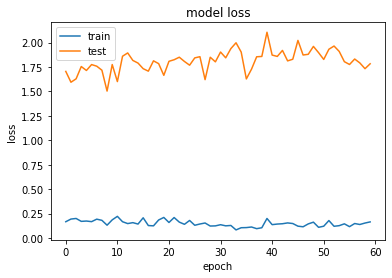

In [40]:

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

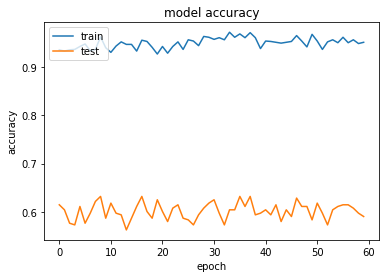

In [41]:

plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
loss, acc = model.evaluate(x_traincnn, y_train)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

36/36 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9896
Restored model, accuracy: 98.96%


In [43]:
loss, acc = model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

9/9 [==============================] - 0s 3ms/step - loss: 1.7831 - accuracy: 0.5903
Restored model, accuracy: 59.03%


In [44]:
emotions={1:'neutral',2: 'calm',3: 'happy', 4:'sad',5: 'angry', 6: 'fearful',7: 'disgust', 8: 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [45]:
import IPython.display as ipd
path_='/content/drive/MyDrive/RAVDESS_Emotional_speech_audio/Actor_14/03-01-01-01-02-02-14.wav'
ipd.Audio(path_)

In [46]:
predict(path_)

1/1 [==============================] - 0s 184ms/step
neutral


In [47]:
model.save('myModel.h5')